<a href="https://colab.research.google.com/github/Dominhthai/loan-classification/blob/main/loan_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import and Read Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Path to dataset
train_data = pd.read_csv('/home/dothai/Downloads/loan_classification/loan-classification/dataset/test.csv')
test_data = pd.read_csv('/home/dothai/Downloads/loan_classification/loan-classification/dataset/test.csv')

In [ ]:
train_data.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
32994,35.0,male,High School,87428.0,10,MORTGAGE,12888.0,MEDICAL,6.47,0.15,7.0,664,Yes,0
32995,26.0,female,Bachelor,91318.0,6,MORTGAGE,8000.0,VENTURE,14.92,0.09,5.0,590,Yes,0
32996,23.0,female,Bachelor,79749.0,0,RENT,16800.0,PERSONAL,11.28,0.21,2.0,632,No,0
32997,25.0,male,High School,51450.0,1,RENT,6000.0,MEDICAL,12.48,0.12,3.0,661,No,0
32998,35.0,male,Bachelor,70632.0,12,RENT,7500.0,DEBTCONSOLIDATION,11.61,0.11,14.0,703,No,0


In [ ]:
test_data.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,28.0,female,Master,66896.0,7,OWN,18000.0,PERSONAL,13.75,0.27,6.0,658,Yes,0
1,26.0,female,Associate,34023.0,4,RENT,2221.0,MEDICAL,12.47,0.07,4.0,636,Yes,0
2,26.0,female,Bachelor,152320.0,2,MORTGAGE,14970.0,PERSONAL,8.24,0.10,4.0,602,Yes,0
3,24.0,female,Associate,37218.0,3,RENT,6000.0,EDUCATION,11.62,0.16,2.0,694,No,0
4,32.0,male,Bachelor,84893.0,8,MORTGAGE,11233.0,DEBTCONSOLIDATION,9.26,0.13,6.0,681,Yes,0
5,31.0,female,Associate,109905.0,10,MORTGAGE,12000.0,MEDICAL,8.21,0.11,6.0,570,Yes,0
6,32.0,female,High School,55070.0,6,RENT,7000.0,VENTURE,12.60,0.13,8.0,630,Yes,0
7,29.0,female,Associate,25018.0,7,OWN,5000.0,HOMEIMPROVEMENT,6.70,0.20,7.0,695,No,0
8,26.0,male,High School,90871.0,1,RENT,9600.0,PERSONAL,9.78,0.11,4.0,631,Yes,0
9,40.0,female,Associate,115262.0,15,MORTGAGE,5000.0,MEDICAL,10.65,0.04,16.0,583,Yes,0


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32999.0,27.738568,6.333872,20.00,23.00,26.00,30.00,144.00
person_income,32999.0,80385.756205,74257.877991,8000.00,47485.50,67188.00,96543.00,7200766.00
person_emp_exp,32999.0,5.516470,6.333516,0.00,1.00,4.00,8.00,125.00
loan_amnt,32999.0,9587.230310,6317.895438,500.00,5000.00,8000.00,12100.00,35000.00
loan_int_rate,32999.0,11.001461,3.069164,5.42,8.49,11.01,13.11,20.00
loan_percent_income,32999.0,0.139147,0.086783,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,32999.0,5.811358,4.050483,2.00,3.00,4.00,8.00,30.00
credit_score,32999.0,633.003697,50.379861,390.00,602.00,640.00,670.00,850.00
loan_status,32999.0,0.215400,0.411106,0.00,0.00,0.00,0.00,1.00


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999 entries, 0 to 32998
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32999 non-null  float64
 1   person_gender                   32999 non-null  object 
 2   person_education                32999 non-null  object 
 3   person_income                   32999 non-null  float64
 4   person_emp_exp                  32999 non-null  int64  
 5   person_home_ownership           32999 non-null  object 
 6   loan_amnt                       32999 non-null  float64
 7   loan_intent                     32999 non-null  object 
 8   loan_int_rate                   32999 non-null  float64
 9   loan_percent_income             32999 non-null  float64
 10  cb_person_cred_hist_length      32999 non-null  float64
 11  credit_score                    32999 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Check duplicated value
duplicate_count = train_data.duplicated().sum()
duplicate_count

0

In [ ]:
train_data.shape

(32999, 14)

In [ ]:
# train_data.sort_values(by='person_age', ascending=True, inplace=False).tail(20)
train_data.sort_values(by='loan_percent_income', ascending=True, inplace=False).tail(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
27878,33.0,male,Bachelor,13376.0,8,OWN,7200.0,VENTURE,6.03,0.54,8.0,715,No,1
28724,31.0,male,High School,37662.0,10,RENT,20200.0,PERSONAL,14.74,0.54,8.0,604,No,1
962,23.0,male,Associate,33227.0,0,RENT,18000.0,VENTURE,11.54,0.54,4.0,679,No,1
17290,23.0,male,Bachelor,36697.0,1,RENT,19750.0,VENTURE,11.14,0.54,4.0,660,No,1
15921,23.0,male,High School,36911.0,2,RENT,19750.0,VENTURE,11.14,0.54,4.0,618,No,1
18322,31.0,male,Associate,37391.0,8,RENT,20200.0,PERSONAL,14.74,0.54,5.0,589,No,1
3535,24.0,female,Master,45514.0,1,MORTGAGE,25000.0,MEDICAL,10.08,0.55,2.0,568,Yes,0
18204,30.0,male,Bachelor,44381.0,7,RENT,24250.0,DEBTCONSOLIDATION,12.61,0.55,7.0,655,No,1
535,22.0,male,High School,38473.0,0,RENT,21250.0,DEBTCONSOLIDATION,12.42,0.55,3.0,599,No,1
10007,21.0,male,Master,16412.0,0,RENT,9250.0,DEBTCONSOLIDATION,12.53,0.56,3.0,707,No,1


<Axes: xlabel='loan_status'>

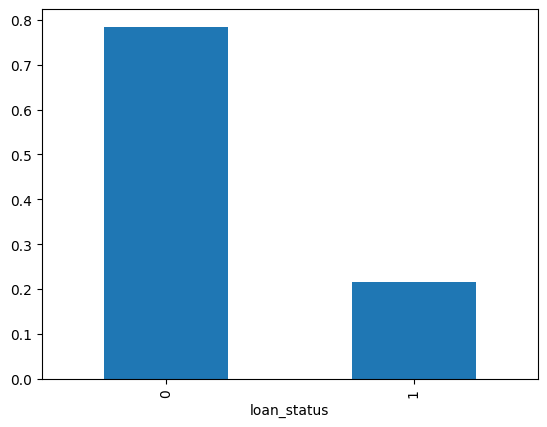

In [ ]:
# train_data['loan_status'].value_counts(normalize=True)
train_data['loan_status'].value_counts(normalize=True).plot(kind='bar')

### **Visualizing + Analyzing probability distribution of each feature**.

#### **Univariate analysis with diagram**.

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


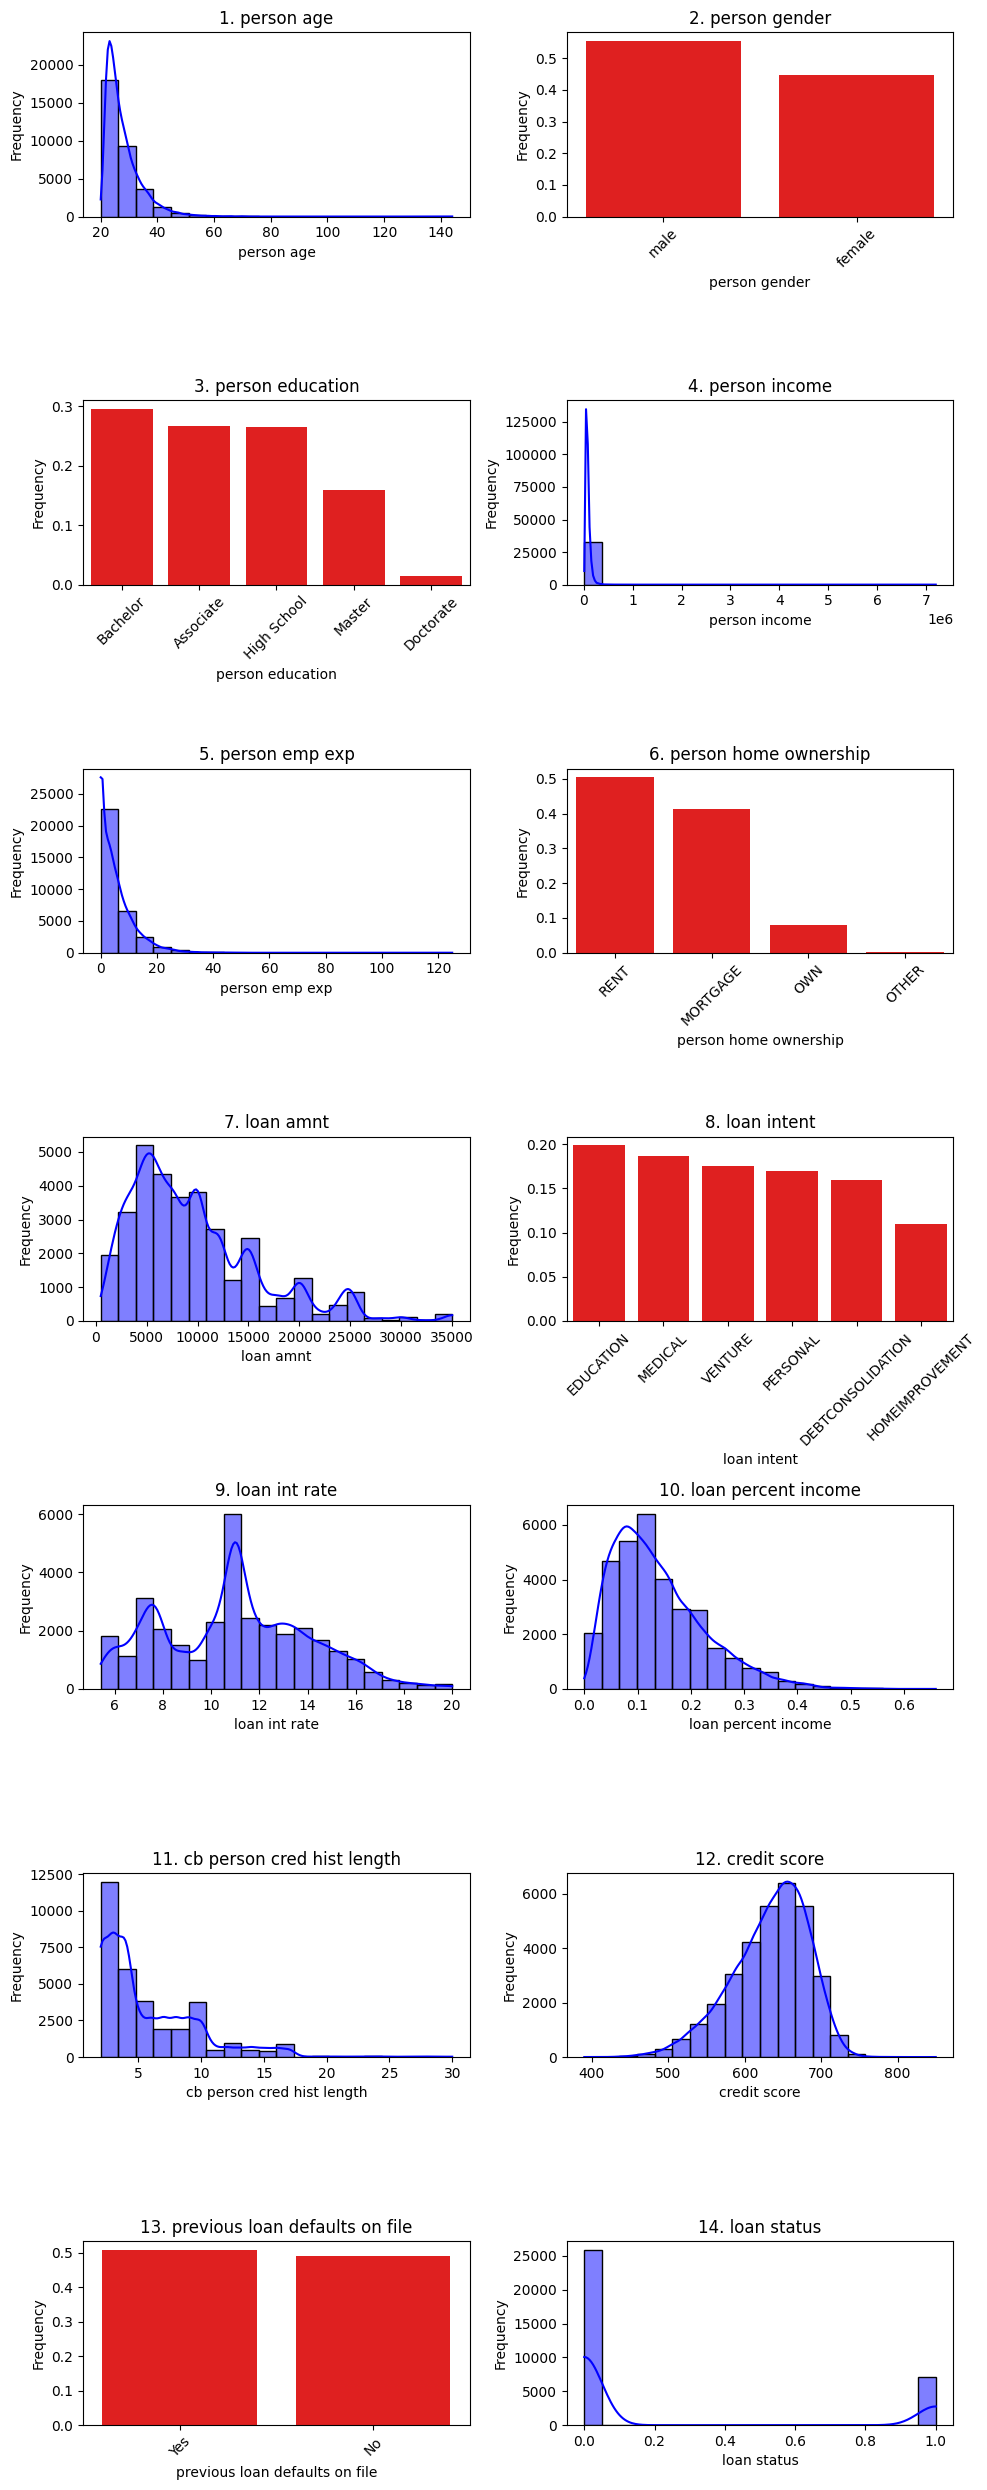

In [ ]:
# Function that visualize those array-selected features
def univariate_analysis(data, columns):
  plt.figure(figsize=(10, 25))

  for idx, col in enumerate(columns):
    plt.subplot(7, 2, idx + 1)

    if data[col].dtype == 'float64' or data[col].dtype == 'int64': # For numeric data
      sns.histplot(data[col], stat='count', alpha=.5, kde=True, bins=20, color='blue') # Add the kernel density (the curve)
      plt.title(f'{idx+1}. {col.replace("_", " ")}')
      plt.xlabel(col.replace('_', ' '))
      plt.ylabel('Frequency')
    else: # For categorical data
      vc = data[col].value_counts() / len(data) # Since we use barplot, we do not have kde, so we have to estimate it manually.
      sns.barplot(x=vc.index, y=vc.values, color='red')
      plt.title(f'{idx+1}. {col.replace("_", " ")}')
      plt.xlabel(col.replace('_', ' '))
      plt.ylabel('Frequency')
      plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

# column_to_visualize = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
print(train_data.columns)
univariate_analysis(train_data, train_data.columns)

From the above insights of analysis, we suppose that:

*   The blue histogram is for continuous/numeric variables, with density (KDE) is the blue curve.
*   The red bar gram is for discrete/categorical variables.


Each variable in detail explanation:

1.   Person age: The age distribution is not a normal distribution, with most people are young (between 20 to 40 years old) (legal age). There are some people with age > 100, which might be the outliers.

  
2.   Person gender: The gender density of people in dataset is equal.


3.   Person education: Most people with requesting a loan has bachelor degree. In contrast, people with top-highest education (master and doctorate) have the least loan-requirements. We can infer that these people acquire better job and financial stability.


4. Person income: We can say people annual income are below $10^6$, meaning a large portion of incomes clustered at lower values. Some very high income values are present, indicating potential outliers. Might relate to **person income (1)**.


5. People emp exp: Years of employment experience are often between 0 to 15, which is feasible as job rule and slightly relates to **person age (1)** and **person income (4)**. There are some strange numbers of experience years higher than 60, which maybe the outliers that we need to remove.


6. People home ownership: Most people home ownership is rent or mortage (not able to buy a house for their own). This maybe relate to **person income (4)**.


7. Loan amount: The loan amount is genetally requested at low values (5000 to 10000). There are a very small number of people asking for a high loan, which we doubt, is the outliers.


8. Loan intent: The highest percent of people uses the loan for education purpose. We can relate this to **person education (3).**


9. Loan interest rate: Typically chosen loan rate is around 7% to 12%.


10. Loan percent income: Generally below 20% of individuals annual income, which illustrates that the loan should not overtly affect people spending. Only a few cases have a higher percentage, suggesting higher risk or lower-income applicants relative to their loan amounts. This relates to **pesron income (4)** and **loan amount (7)**. (since 10 = 4/7)


11. cb person credit history length: The average time starting from a person making a credit is around 3 to 5 years. This might relate to **person age (2)**.


12. credit score: Slightly looks like normal distribution around the mid-range (600-700).





#### **Univariate outliers analysis with boxplot.**

Using the box plot, we will know where most data values are distributed. The small dots might cause outliers. The analysis boxplot is used for
***numeric data***.

In [ ]:
dtype_counts = train_data.dtypes.value_counts()
print(dtype_counts)

float64    6
object     5
int64      3
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

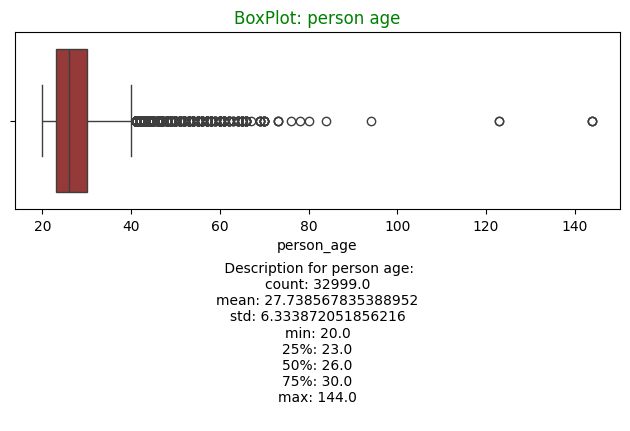

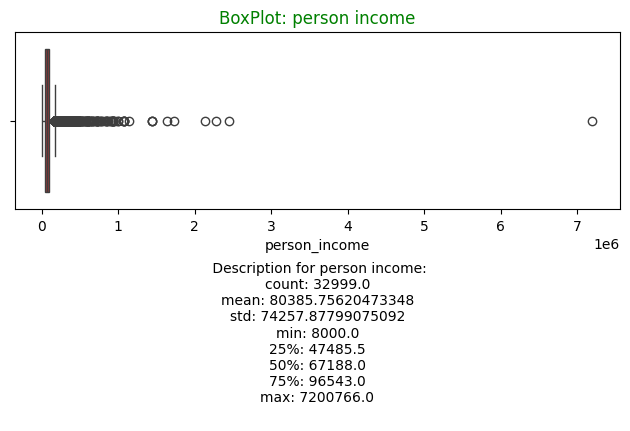

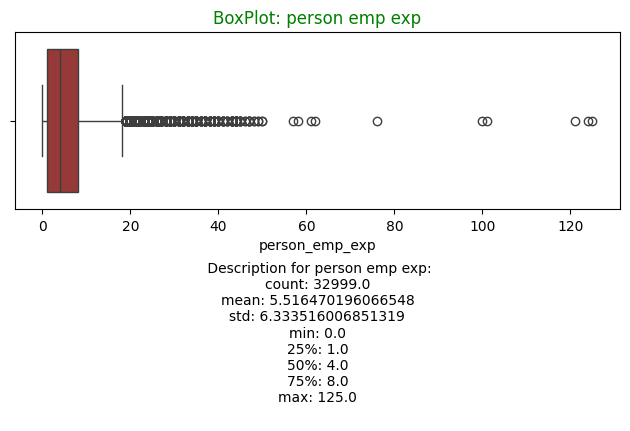

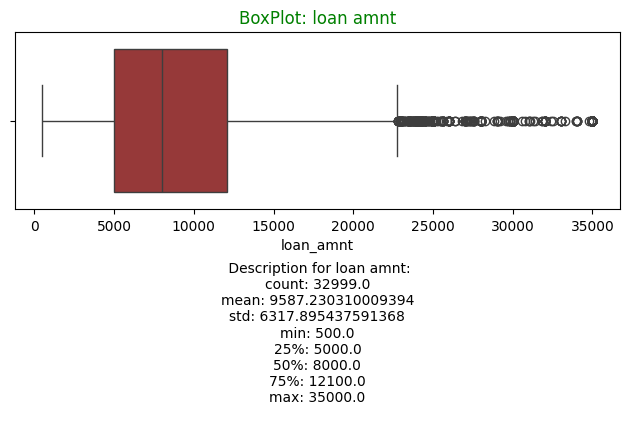

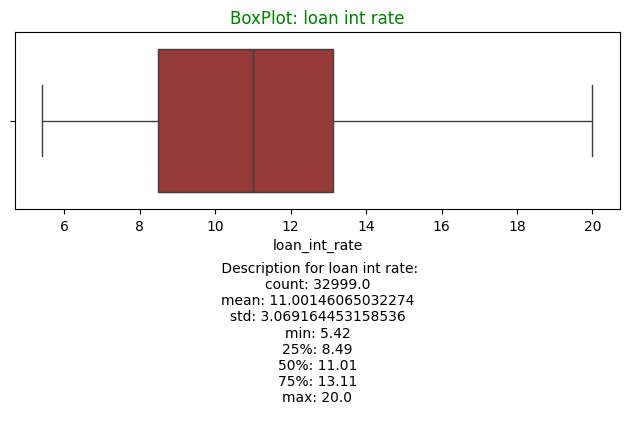

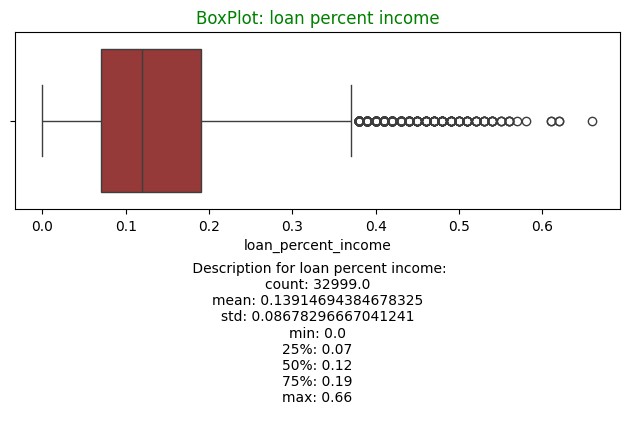

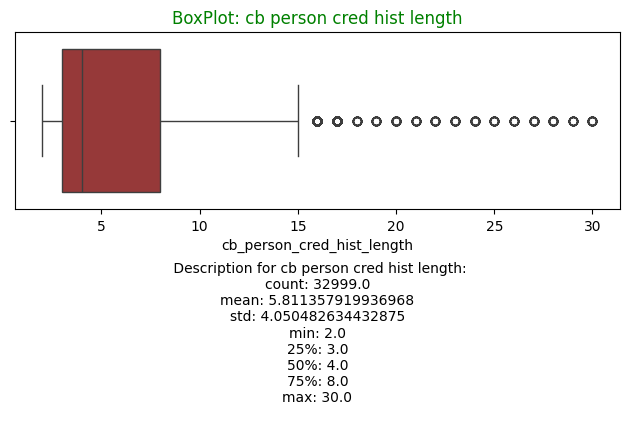

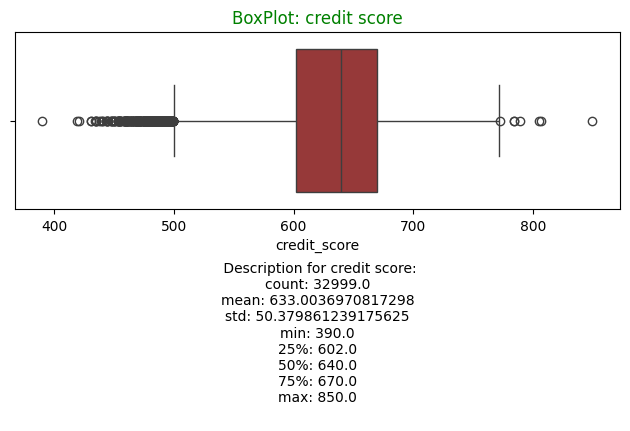

In [ ]:
def boxplot_analysis(data, columns):
  plt.figure(figsize=(12, 10))

  for idx, col in enumerate(columns):
    fig, ax = plt.subplots()
    sns.boxplot(x=data[col], color='brown', ax=ax) # Plot on the axes
    plt.title(f'BoxPlot: {col.replace("_", " ")}', color='green')

    # Get description for each histogram
    desc = data[col].describe()

    # Format the text
    text = f"\n Description for {col.replace('_', ' ')}:\n"
    for stat, value in desc.items():
        text += f"{stat}: {value}\n"  # Format to 2 decimal places

    # Add the text below the boxplot
    ax.text(0.5, -0.2, text, transform=ax.transAxes, ha='center', va='top')

    plt.tight_layout()
    plt.show()

# Numerical columns(8 features)
boxplot_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
boxplot_analysis(train_data, boxplot_columns)

#### **Bivariate Analysis**



1.   **We wanna compare relationship between different features. Here, we use correlation matrix (heatmap):**



---


> ***Note: We only run this code after we had applied Encoding Technquies below!!!***





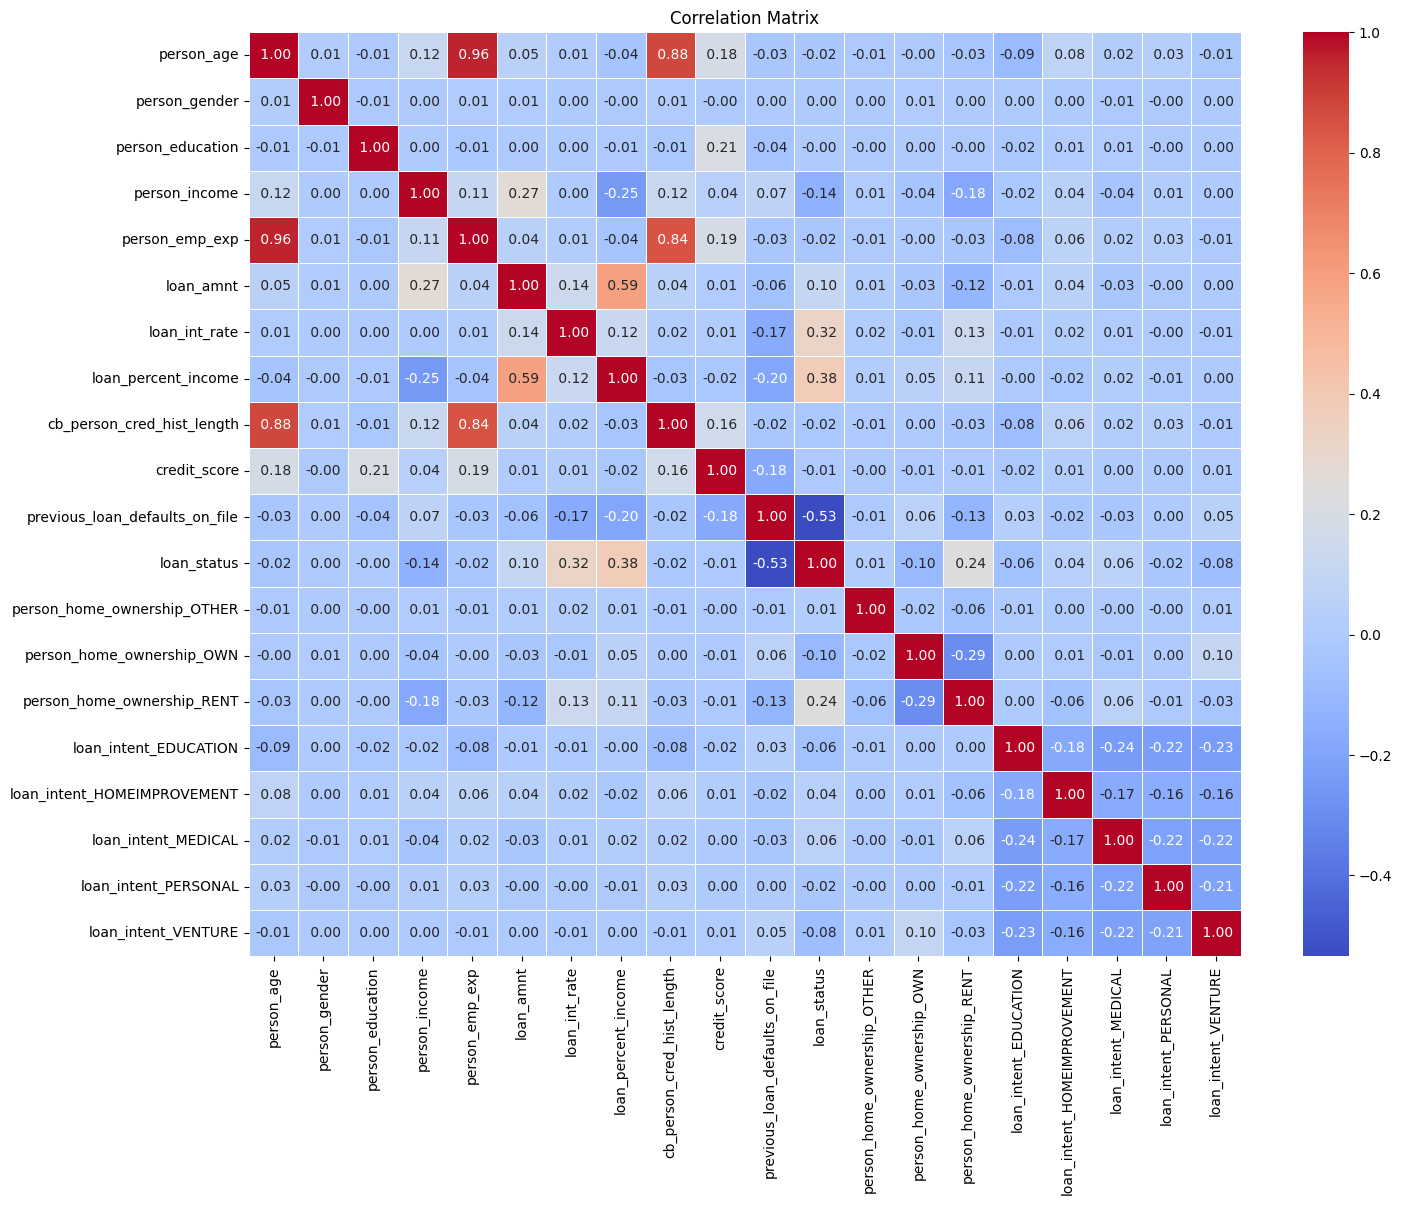

In [ ]:
plt.figure(figsize=(16, 12))
# Use only numeric data
# numeric_data = train_data.select_dtypes(include=[np.number])
# correlation_matrix = numeric_data.corr()
correlation_matrix = train_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt = ' .2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

2. **Next, we compare relationship between each feature and target (loan

1.   Mục danh sách
2.   Mục danh sách

status**).



*   For categorical features:




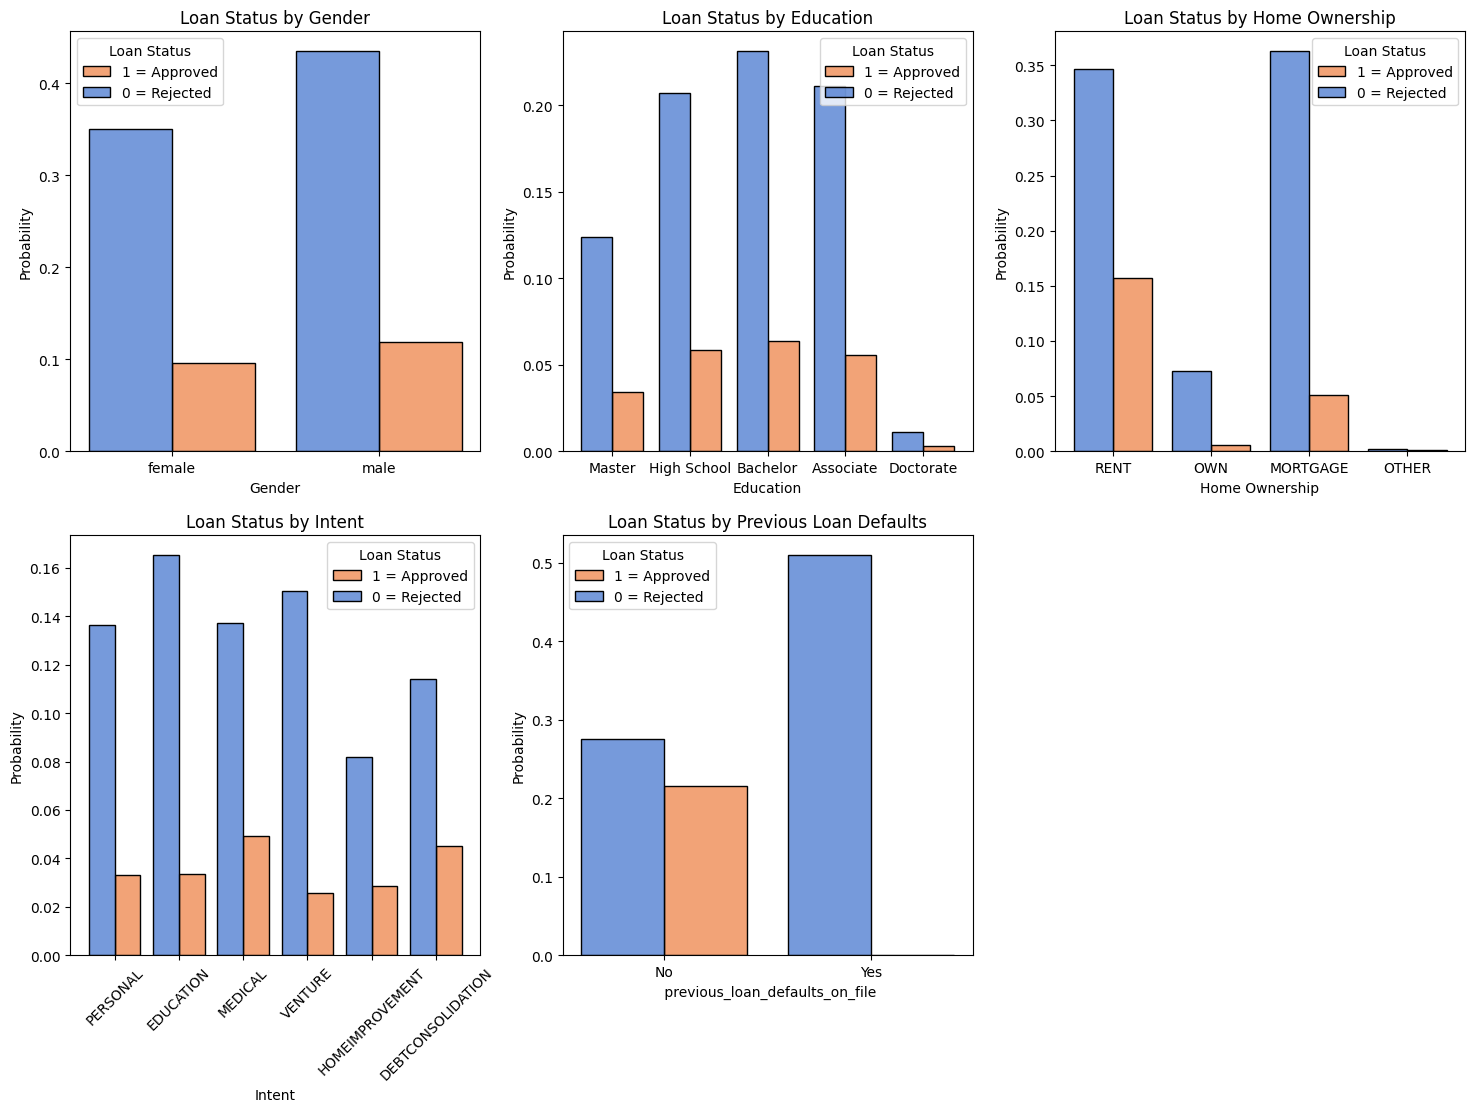

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Person gender
sns.histplot(data=train_data, x='person_gender',
             hue='loan_status', # color each bar(gender) based on loan_status(0 or 1)
             stat="probability",   # or stat="percent" for percentages
             multiple="dodge", shrink=.8,  # To make bars like countplot
             ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Loan Status by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Probability')
axes[0, 0].legend(title='Loan Status', labels = ['1 = Approved', '0 = Rejected']) # Order: The less occurence value counts first

# Person education
sns.histplot(data=train_data, x='person_education',
             hue='loan_status', stat="probability",  # or stat="percent" for percentages
             multiple="dodge", shrink=.8,  # To make bars like countplot
             ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Loan Status by Education')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].legend(title='Loan Status', labels = ['1 = Approved', '0 = Rejected'])

# Person home ownership
sns.histplot(data=train_data, x='person_home_ownership',
             hue='loan_status', stat="probability",  # or stat="percent" for percentages
             multiple="dodge", shrink=.8,  # To make bars like countplot
             ax=axes[0, 2], palette='muted')
axes[0, 2].set_title('Loan Status by Home Ownership')
axes[0, 2].set_xlabel('Home Ownership')
axes[0, 2].set_ylabel('Probability')
axes[0, 2].legend(title='Loan Status', labels = ['1 = Approved', '0 = Rejected'])

# Loan intent
sns.histplot(data=train_data, x='loan_intent',
             hue='loan_status', stat="probability",  # or stat="percent" for percentages
             multiple="dodge", shrink=.8,  # To make bars like countplot
             ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Loan Status by Intent')
axes[1, 0].set_xlabel('Intent')
axes[1, 0].set_ylabel('Probability')
axes[1, 0].legend(title='Loan Status', labels = ['1 = Approved', '0 = Rejected'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# previous_loan_defaults_on_file
sns.histplot(data=train_data, x='previous_loan_defaults_on_file',
             hue='loan_status', stat="probability",  # or stat="percent" for percentages
             multiple="dodge", shrink=.8,  # To make bars like countplot
             ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Loan Status by Previous Loan Defaults')
axes[1, 1].set_xlabel(' previous_loan_defaults_on_file')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].legend(title='Loan Status', labels = ['1 = Approved', '0 = Rejected'])

# Hide the last subplot ( not needed)
fig.delaxes(axes[1][2])



*   For numerical features:



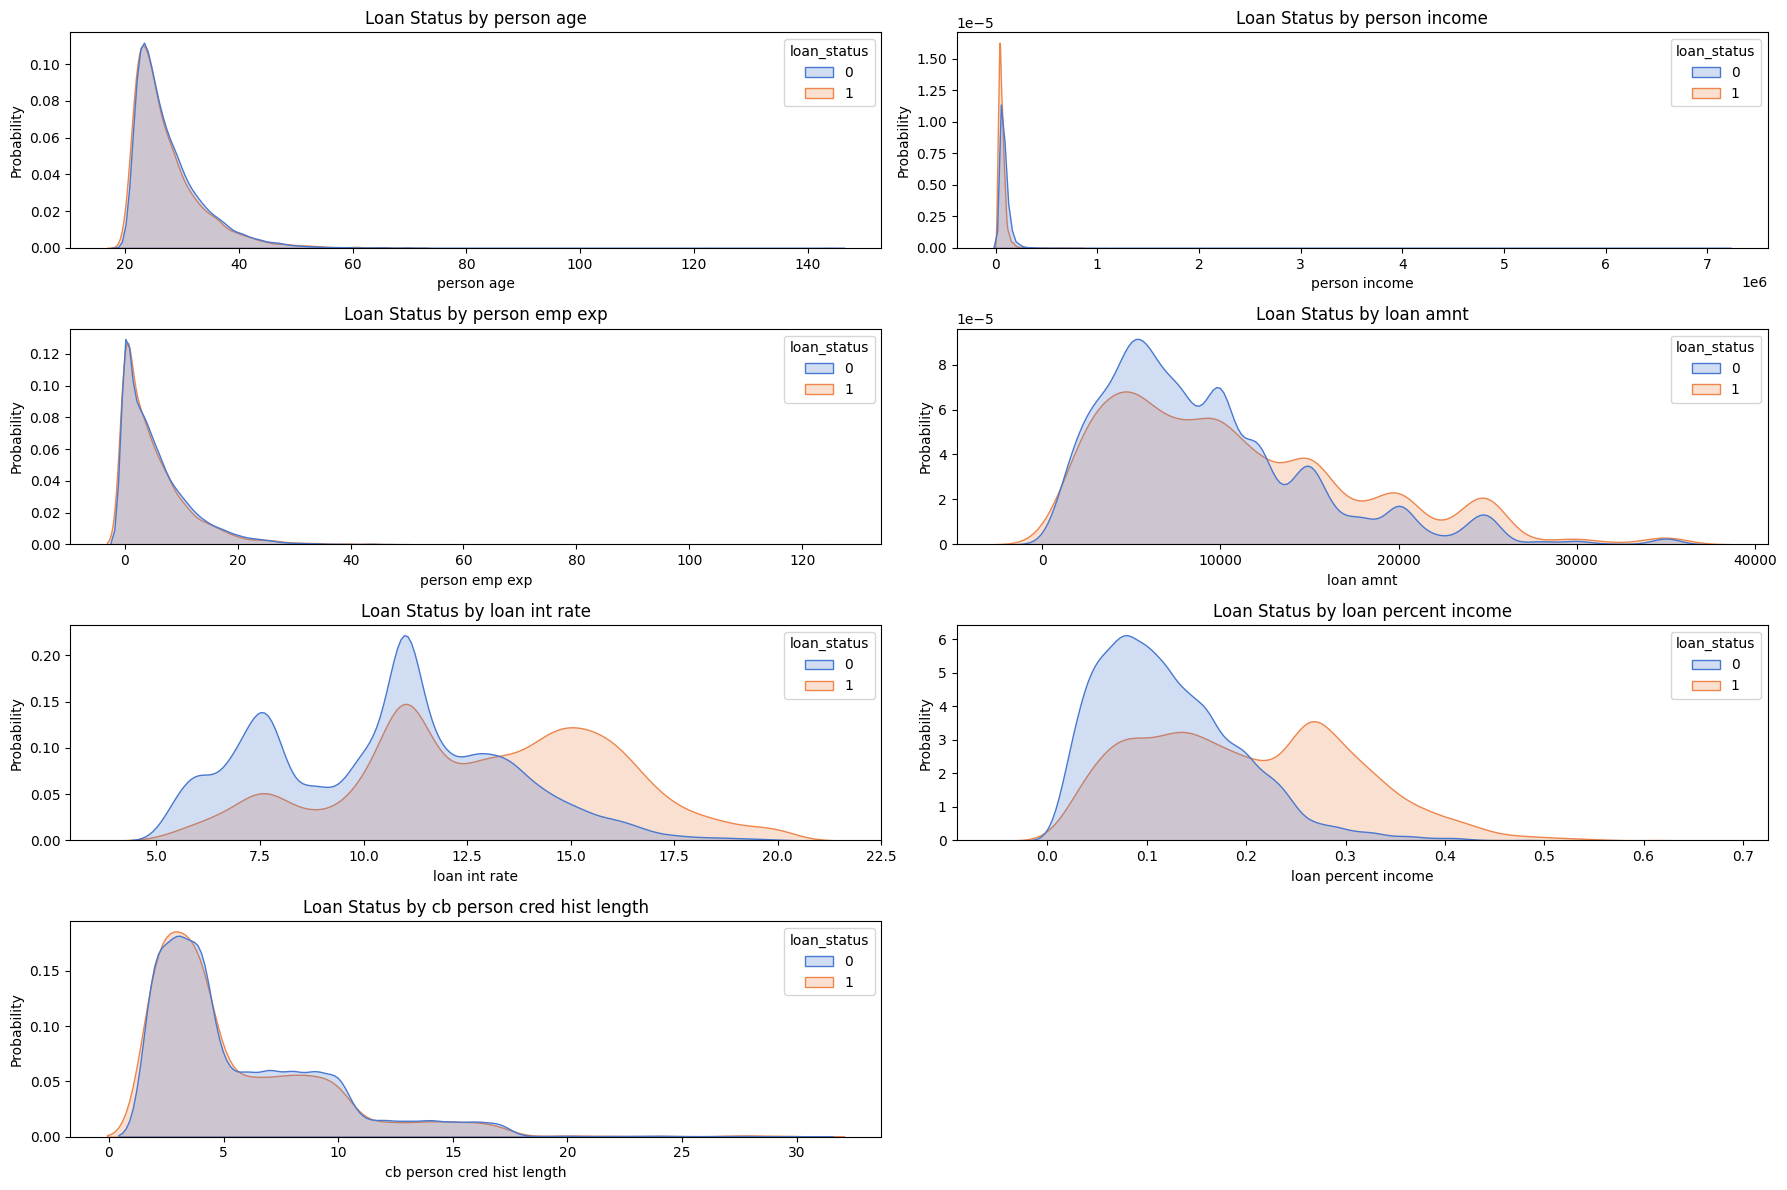

In [ ]:
def plot_numerical(data, columns):
  fig, axes = plt.subplots(4, 2, figsize=(18, 12))

  for idx, col in enumerate(columns):
    sns.kdeplot(data=data, x=col, hue='loan_status',
                fill=True, ax=axes[idx//2, idx%2],
                common_norm=False, palette='muted')
    axes[idx//2, idx%2].set_title(f'Loan Status by {col.replace("_", " ")}')
    axes[idx//2, idx%2].set_xlabel(col.replace('_', ' '))
    axes[idx//2, idx%2].set_ylabel('Probability')

  fig.delaxes(axes[3, 1])
  plt.tight_layout()
  plt.show()

# 8 values, except from loan_status
numeric_columns = ['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']

plot_numerical(train_data, numeric_columns)

### **Preprocessing data**



1.   **First, we encode categorical feature data:**



In [ ]:
# Binary encoding
train_data['person_gender'] = train_data['person_gender'].map({'female': 0, 'male': 1})
test_data['person_gender'] = test_data['person_gender'].map({'female': 0, 'male': 1})
train_data['previous_loan_defaults_on_file'] = train_data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
test_data['previous_loan_defaults_on_file'] = test_data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

# Ordinary Encoding
train_data['person_education'] = train_data['person_education'].map({
    'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4
})
test_data['person_education'] = test_data['person_education'].map({
    'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4
})

# One-hot encoding
train_data = pd.get_dummies(train_data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

print(train_data.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 3        71948.0               0   
1        21.0              0                 0        12282.0               0   
2        25.0              0                 0        12438.0               3   
3        23.0              0                 2        79753.0               0   
4        24.0              1                 3        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

2. **We handle outliers in 2 different ways**:


---







*   ***Replace Outliers with Median:***






In [ ]:
median_age = train_data['person_age'].median()
train_data['person_age'] = train_data['person_age'].apply(lambda x: median_age if x > 95 else x)

# median_income = train_data['person_income'].median()
# train_data['person_income'] = train_data['person_income'].apply(lambda x: median_income if x > 1000000 else x)

median_person_emp_exp = train_data['person_emp_exp'].median()
train_data['person_emp_exp'] = train_data['person_emp_exp'].apply(lambda x: median_person_emp_exp
                                                                  if x > 70 else x)

# median_loan_percent_income = train_data[';loan_percent_income'].median()
# train_data['loan_percent_income'] = train_data['loan_percent_income'].apply(lambda x: median_loan_percent_income
#                                                                             if x > 60 else x)

<Figure size 1200x1000 with 0 Axes>

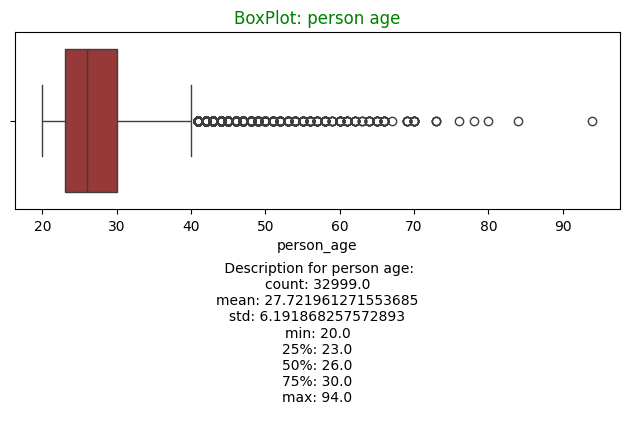

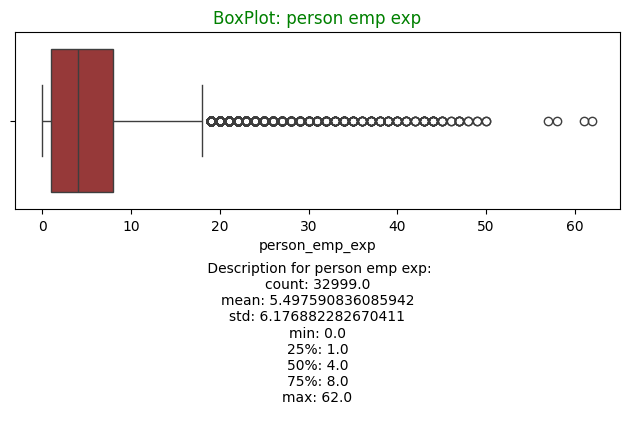

In [ ]:
def boxplot_analysis(data, columns):
  plt.figure(figsize=(12, 10))

  for idx, col in enumerate(columns):
    fig, ax = plt.subplots()
    sns.boxplot(x=data[col], color='brown', ax=ax) # Plot on the axes
    plt.title(f'BoxPlot: {col.replace("_", " ")}', color='green')

    # Get description for each histogram
    desc = data[col].describe()

    # Format the text
    text = f"\n Description for {col.replace('_', ' ')}:\n"
    for stat, value in desc.items():
        text += f"{stat}: {value}\n"  # Format to 2 decimal places

    # Add the text below the boxplot
    ax.text(0.5, -0.2, text, transform=ax.transAxes, ha='center', va='top')

    plt.tight_layout()
    plt.show()

# Numerical columns
boxplot_columns = ['person_age', 'person_emp_exp']
boxplot_analysis(train_data, boxplot_columns)

### **Train And Evaluation**

#### **Split And Remove Features**

Here, we split each dataset(train and test data) into features X and label Y. Moreover, we'll drop some 'unneccessary' features, which are *person_gender* (As shown in correlation heatmap, they play almost no relationship between features and the final label). Hence, we see them as redundant.

In [ ]:
# # Split the dataset into input and label
# X_train = train_data.drop('loan_status', axis=1).values
# y_train = train_data['loan_status'].values

# X_test = test_data.drop('loan_status', axis=1).values
# y_test = test_data['loan_status'].values

X_train = train_data.drop(['person_gender', 'loan_status'], axis=1).values
y_train = train_data['loan_status'].values

X_test = test_data.drop(['person_gender', 'loan_status'], axis=1).values
y_test = test_data['loan_status'].values

# X_train = train_data.drop(['person_gender', 'person_education', 'loan_status'], axis=1).values
# y_train = train_data['loan_status'].values

# X_test = test_data.drop(['person_gender', 'person_education', 'loan_status'], axis=1).values
# y_test = test_data['loan_status'].values

In [ ]:
display(X_train.head())
display(y_train.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,71948.0,0.0,35000.0,16.02,0.49,3.0,561,0,False,False,True,False,False,False,True,False
1,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504,1,False,True,False,True,False,False,False,False
2,25.0,12438.0,3.0,5500.0,12.87,0.44,3.0,635,0,False,False,False,False,False,True,False,False
3,23.0,79753.0,0.0,35000.0,15.23,0.44,2.0,675,0,False,False,True,False,False,True,False,False
4,24.0,66135.0,1.0,35000.0,14.27,0.53,4.0,586,0,False,False,True,False,False,True,False,False


,loan_status
0,1
1,0
2,1
3,1
4,1


In [ ]:
!pip install catboost==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.6 MB/s eta 0:00:00



#### **Import Libraries, nn module And Evaluation Methods.**




*  *Import Libaries And NN Module:*



In [ ]:
# import important Library
from sklearn.preprocessing import RobustScaler # Robust to every possible new outlier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report # Evaluation metrics
from sklearn.model_selection import GridSearchCV

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Confirm with another Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# import Neural Network module
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings("ignore")



*   *Evaluation Metrics:*



In [ ]:
class Evaluation:
    def __init__(self, y_true=0, y_pred=0):
        self.y_true = y_true
        self.y_pred = y_pred  # Ensure predictions are binary

    def recall(self):
        true_positives = torch.sum(torch.round(torch.clamp(self.y_true * self.y_pred, 0, 1)))
        possible_positives = torch.sum(torch.round(torch.clamp(self.y_true, 0, 1)))
        recall = true_positives / (possible_positives + 1e-7)  # Avoid division by zero
        return recall

    def precision(self):
        true_positives = torch.sum(torch.round(torch.clamp(self.y_true * self.y_pred, 0, 1)))
        predicted_positives = torch.sum(torch.round(torch.clamp(self.y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + 1e-7)
        return precision

    def accuracy(self):
        correct_predictions = torch.sum(torch.eq(self.y_true, self.y_pred))  # Count where y_true equals y_pred
        total_samples = self.y_true.numel()  # Total number of samples
        accuracy = correct_predictions / total_samples  # Ratio of correct predictions to total samples
        return accuracy

    def f1(self):
        precision = self.precision()
        recall = self.recall()
        f1 = 2 * (precision * recall) / (precision + recall + 1e-7)
        return f1


*   *This step, we simply keep the model estimate based on median, instead of mean and standard deviation / variance. That way, we can alleviate the outliers problem*.





---



> ***RobustScaler is a preprocessing technique used to scale features, making them less susceptible to the influence of outliers. It achieves this by using statistics that are robust to outliers, namely the median and interquartile range (IQR).***


---





In [ ]:
# Use Robust Scaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### ***Train And Evaluate with Classifiers From Scikit-Learn.***


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9108
           1       0.81      0.76      0.79      2892

    accuracy                           0.90     12000
   macro avg       0.87      0.85      0.86     12000
weighted avg       0.90      0.90      0.90     12000



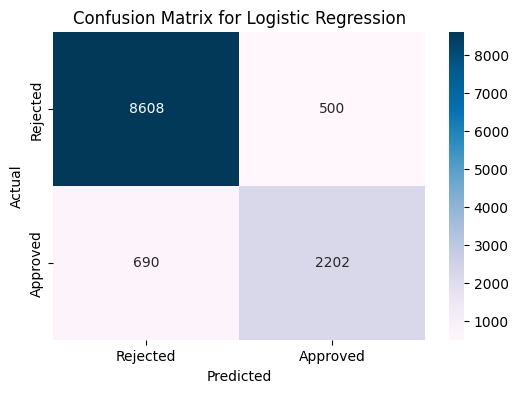



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9108
           1       0.92      0.78      0.85      2892

    accuracy                           0.93     12000
   macro avg       0.93      0.88      0.90     12000
weighted avg       0.93      0.93      0.93     12000



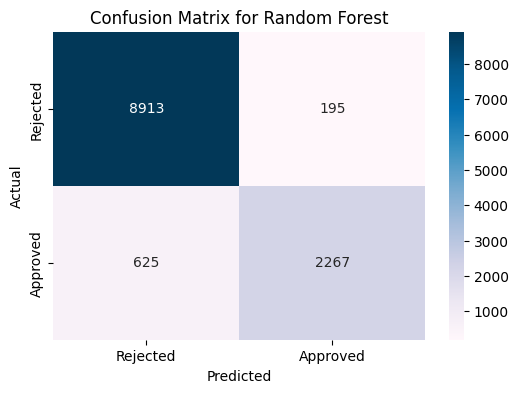



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9108
           1       0.92      0.81      0.86      2892

    accuracy                           0.94     12000
   macro avg       0.93      0.89      0.91     12000
weighted avg       0.94      0.94      0.94     12000



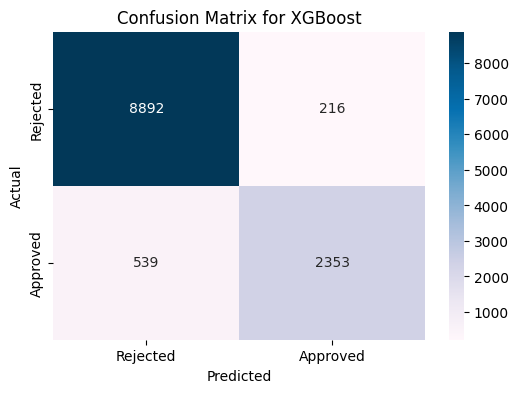



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9108
           1       0.92      0.78      0.85      2892

    accuracy                           0.93     12000
   macro avg       0.93      0.88      0.90     12000
weighted avg       0.93      0.93      0.93     12000



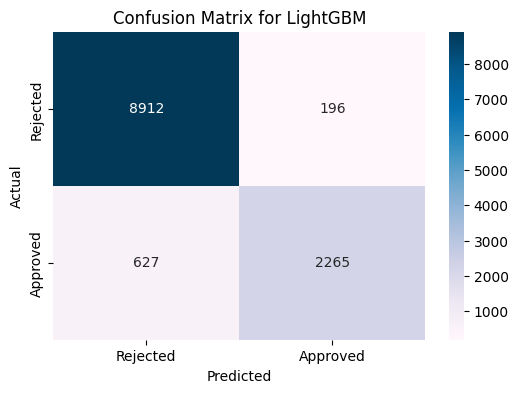



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9108
           1       0.92      0.79      0.85      2892

    accuracy                           0.93     12000
   macro avg       0.93      0.89      0.90     12000
weighted avg       0.93      0.93      0.93     12000



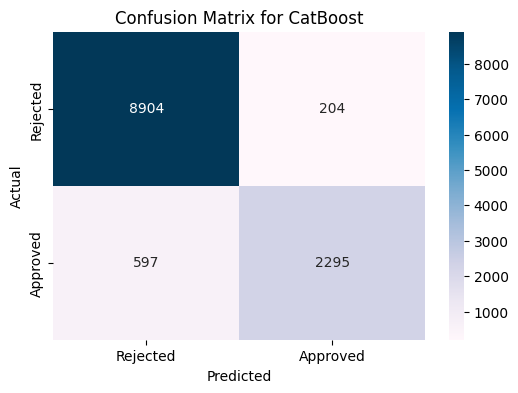



Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9108
           1       0.89      0.76      0.82      2892

    accuracy                           0.92     12000
   macro avg       0.91      0.87      0.89     12000
weighted avg       0.92      0.92      0.92     12000



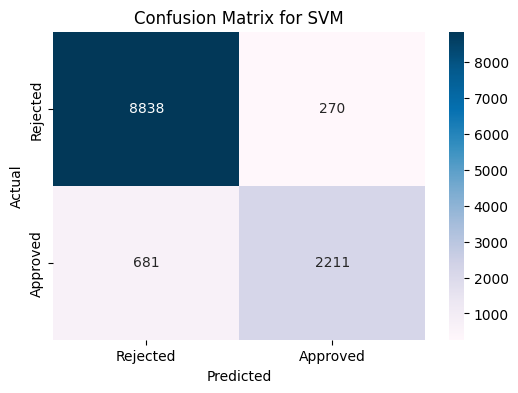



Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9108
           1       0.85      0.74      0.79      2892

    accuracy                           0.91     12000
   macro avg       0.89      0.85      0.87     12000
weighted avg       0.91      0.91      0.91     12000



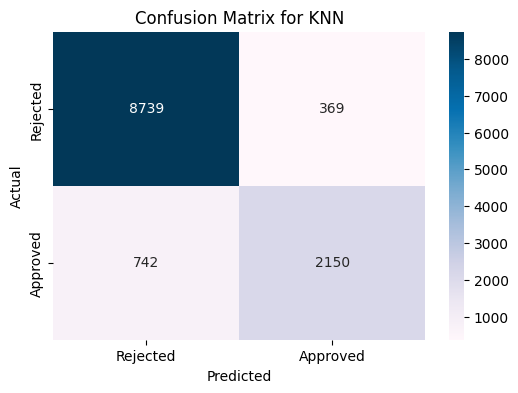



Classification Report for Bagging:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9108
           1       0.94      0.73      0.82      2892

    accuracy                           0.92     12000
   macro avg       0.93      0.85      0.88     12000
weighted avg       0.92      0.92      0.92     12000



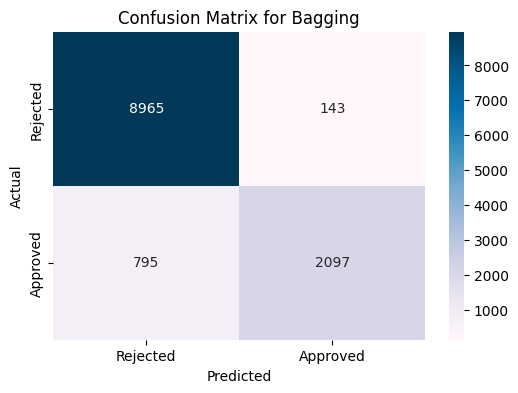

In [ ]:
bagging_parameters = {
    'bootstrap': [True, False],
    'estimator__max_depth': [2, 5, 10, 20, 50, 100],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__class_weight': ['balanced', None],
    'estimator__criterion': ['entropy', 'gini']
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "SVM": SVC(C=1),
    "KNN": KNeighborsClassifier(),
    "Bagging Classifier": GridSearchCV(BaggingClassifier(DecisionTreeClassifier())
                   , param_grid = bagging_parameters
                   , cv=5
                   , n_jobs=-1)
}

results = []

for name, model in models.items():
    # Initialize model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_pred = model.predict(X_test)

    # Train and Test Scores
    # train_score = model.score(X_train, y_train)
    # test_score = model.score(X_test, y_test)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # results.append({
    #     'Model': name,
    #     'Train Score': train_score,
    #     'Test Score': test_score,
    #     'Accuracy Score': accuracy
    # })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n" + "="*60 + "\n")


#### ***Train And Evaluate With A Simple Built Neural Network.***

##### **Neural Network Architecture:**




1.   **Read and load the dataset**





In [ ]:
# Custom Dataset Class
class LoanApprovalDataset(data.Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels).view(-1, 1)  # Reshaping for compatibility

        # Ensure features are converted to a float type and NaNs are handled
        # self.features = torch.FloatTensor(np.nan_to_num(np.array(features, dtype=np.float32)))
        # self.labels = torch.FloatTensor(np.array(labels, dtype=np.float32)).view(-1, 1)  # Reshaping for compatibility


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = LoanApprovalDataset(X_train, y_train)
test_dataset = LoanApprovalDataset(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # Gradient Descent.
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

2. **Neural Network Construction**

In [ ]:
# Define the neural network model
class LoanApprovalModel(nn.Module):
    def __init__(self):
        super(LoanApprovalModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Input layer
        self.fc2 = nn.Linear(64, 32)                 # Hidden layer
        self.fc3 = nn.Linear(32, 10)                  # Output layer
        self.fc4 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Add dropout for additional regularization
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        # x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        # x = self.dropout(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Use GPU
device = torch.device("cuda")

# Initialize the model, loss function, and optimizer, and run them on GPU
model = LoanApprovalModel().to(device)
criterion = nn.BCELoss().to(device)  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Regularization parameters
l1_lambda = 5e-5  # L1 regularization strength
l2_lambda = 5e-5  # L2 regularization strength



#####  **Training Step And Finding The Best Model.**



In [ ]:
# Training the model
num_epochs = 100
best_val_accuracy = 0
best_model = None

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    for inputs, labels in train_loader:  # Iterate over batches
        # Use GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # L1 regularization
        l1_reg = torch.tensor(0., requires_grad=True).to(device)
        for param in model.parameters():
            l1_reg = l1_reg + torch.norm(param, 1)

        # # L2 regularization
        # l2_reg = torch.tensor(0., requires_grad=True).to(device)
        # for param in model.parameters():
        #     l2_reg = l2_reg + torch.norm(param, 2)

        # Total loss with L1 regularization
        loss = loss + l1_lambda * l1_reg

        # Total loss with L2 regularization
        # loss = loss + l2_lambda * l2_reg

        # Total loss with L2+L1 regularization
        # loss = loss + l2_lambda * l2_reg + l1_lambda * l1_reg

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Model Validation - Find And Save The Best Model
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
      for inputs, labels in test_loader:

        # Use GPU
        inputs, labels = inputs.to(device), labels.to(device)

        test_outputs = model(inputs)
        predicted = (test_outputs > 0.5).float()  # If outputs > 0.5 return 1(approved) else 0(rejected)
        all_preds.append(predicted)
        all_labels.append(labels)

      # Concatenate results
      all_preds = torch.cat(all_preds).cpu().numpy()
      all_labels = torch.cat(all_labels).cpu().numpy()
      evaluation = Evaluation(torch.tensor(all_labels).to(device), torch.tensor(all_preds).to(device))

      # test_accuracy = accuracy_score(all_labels, all_preds)
      test_accuracy = evaluation.accuracy()
      test_recall = evaluation.recall()
      test_precision = evaluation.precision()
      test_f1 = evaluation.f1()

      # Print the Loss after each epoch
      # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val_accuracy: {test_accuracy:.4f}')
      # if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {test_accuracy:.4f}, Recall: {test_recall:.4f}, Precision: {test_precision:.4f}, F1-Score: {test_f1:.4f}')

      # Check for best score (Best model)
      if test_accuracy > best_val_accuracy:
        best_val_accuracy = test_accuracy
        best_model = model.state_dict()

Epoch [1/100], Loss: 0.0604, Accuracy: 0.9207, Recall: 0.7960, Precision: 0.8644, F1-Score: 0.8288
Epoch [2/100], Loss: 0.3873, Accuracy: 0.9224, Recall: 0.8067, Precision: 0.8625, F1-Score: 0.8337
Epoch [3/100], Loss: 0.1134, Accuracy: 0.9090, Recall: 0.6750, Precision: 0.9278, F1-Score: 0.7814
Epoch [4/100], Loss: 0.0825, Accuracy: 0.9204, Recall: 0.7472, Precision: 0.9061, F1-Score: 0.8190
Epoch [5/100], Loss: 0.0905, Accuracy: 0.9218, Recall: 0.7666, Precision: 0.8936, F1-Score: 0.8252
Epoch [6/100], Loss: 0.1544, Accuracy: 0.9218, Recall: 0.7607, Precision: 0.8991, F1-Score: 0.8241
Epoch [7/100], Loss: 0.1426, Accuracy: 0.9207, Recall: 0.7635, Precision: 0.8921, F1-Score: 0.8228
Epoch [8/100], Loss: 0.0464, Accuracy: 0.9197, Recall: 0.7344, Precision: 0.9159, F1-Score: 0.8152
Epoch [9/100], Loss: 0.0997, Accuracy: 0.9180, Recall: 0.8126, Precision: 0.8417, F1-Score: 0.8269
Epoch [10/100], Loss: 0.3124, Accuracy: 0.9195, Recall: 0.7334, Precision: 0.9158, F1-Score: 0.8145
Epoch [11

##### **Validation Step.**

Test Accuracy: 0.9227
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9108
         1.0       0.93      0.73      0.82      2892

    accuracy                           0.92     12000
   macro avg       0.93      0.86      0.89     12000
weighted avg       0.92      0.92      0.92     12000



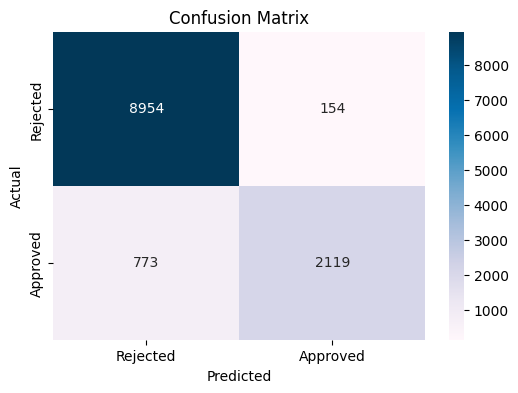

In [ ]:
# Load best model parameters
model.load_state_dict(best_model)

# Final evaluation on the test set
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        test_outputs = model(inputs)
        test_preds.append((test_outputs > 0.5).float())
        test_labels.append(labels)

# Concatenate results
test_preds = torch.cat(test_preds).cpu().numpy()
test_labels = torch.cat(test_labels).cpu().numpy()

# Calculate accuracy on test set
# test_accuracy = accuracy_score(test_labels, test_preds)
evaluation = Evaluation(torch.tensor(test_labels).to(device), torch.tensor(test_preds).to(device))
# test_accuracy = accuracy_score(all_labels, all_preds)
test_accuracy = evaluation.accuracy()
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report
print(classification_report(test_labels, test_preds))

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()